### Loading Library 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)
plt.style.use('fivethirtyeight')

### Data pre-processing

There are 1 NULL value in CREDIT_LIMIT and 313 NULL values in MINIMUM_PAYMENTS.

Missing values were filled with the mean of the existing values in their own column.

In [2]:
df = pd.read_csv("CC_GENERAL.csv")

#fill null values with corresponding mean values
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
df.drop('CUST_ID', axis=1, inplace=True) #As it is object type , we drop customer ID

#### EDA of Numeric data
Here EDA is done only for numeric data. 

Also, customer ID was dropped out because it is unique as EDA on it does not give much insight.

#### Pearson's correlation

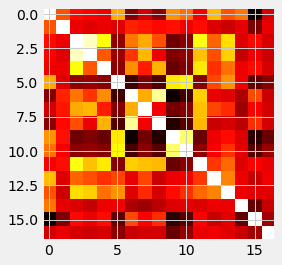

In [3]:
dfCorr = df.corr() #default gives pearson's correlation matrix
plt.imshow(dfCorr, cmap='hot', interpolation='nearest')
plt.show()

Check number of unique values for boxplot and histogram to get the least numbers as grouping variable:

In [4]:
for col in df.columns:
  print(col, df[col].nunique())

BALANCE 8871
BALANCE_FREQUENCY 43
PURCHASES 6203
ONEOFF_PURCHASES 4014
INSTALLMENTS_PURCHASES 4452
CASH_ADVANCE 4323
PURCHASES_FREQUENCY 47
ONEOFF_PURCHASES_FREQUENCY 47
PURCHASES_INSTALLMENTS_FREQUENCY 47
CASH_ADVANCE_FREQUENCY 54
CASH_ADVANCE_TRX 65
PURCHASES_TRX 173
CREDIT_LIMIT 206
PAYMENTS 8711
MINIMUM_PAYMENTS 8637
PRC_FULL_PAYMENT 47
TENURE 7


Tenure has the least value, so we use that for boxplot and histogram

#### Histogram

Histogram was built for various attributes, including Balance Frequency, Purchases Frequency, One-go Purchases Frequency, Purchases Frequency in Instalment, “Cash in Advance” Paying Frequency, Number of Transactions made with "Cash in Advance", Number of purchase transactions made, Tenure of credit card service for users.

<Figure size 1440x720 with 0 Axes>

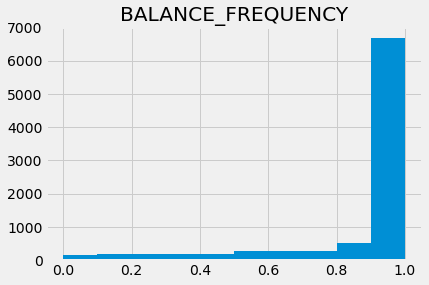

<Figure size 1440x720 with 0 Axes>

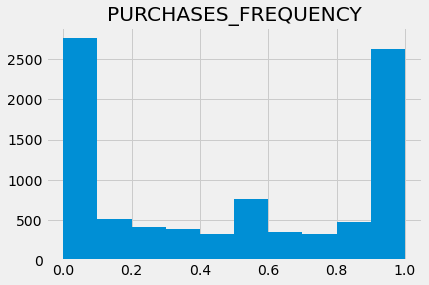

<Figure size 1440x720 with 0 Axes>

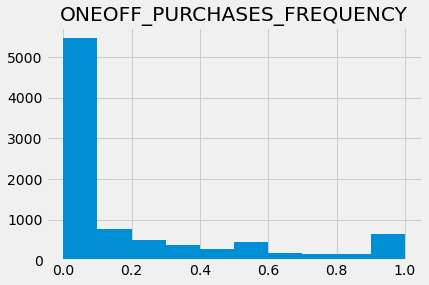

<Figure size 1440x720 with 0 Axes>

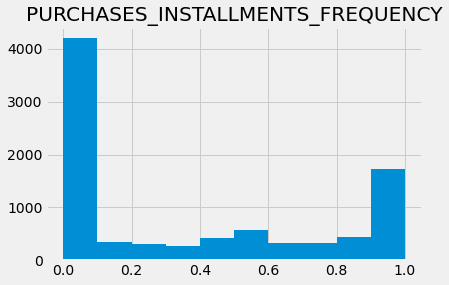

<Figure size 1440x720 with 0 Axes>

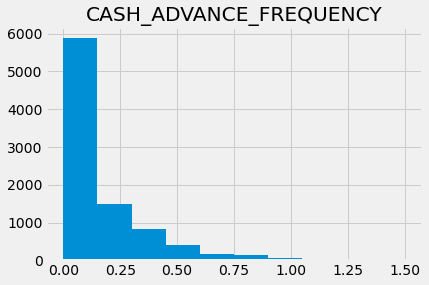

<Figure size 1440x720 with 0 Axes>

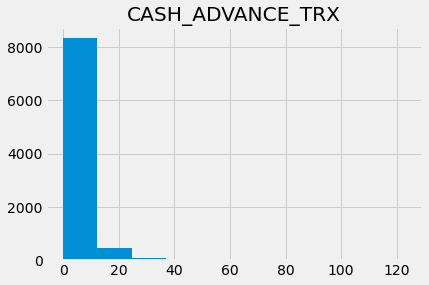

<Figure size 1440x720 with 0 Axes>

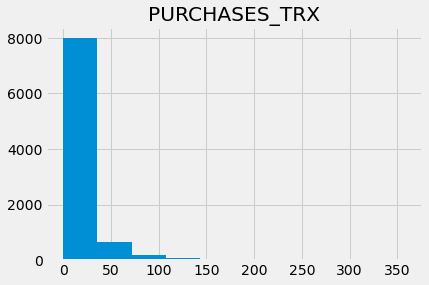

<Figure size 1440x720 with 0 Axes>

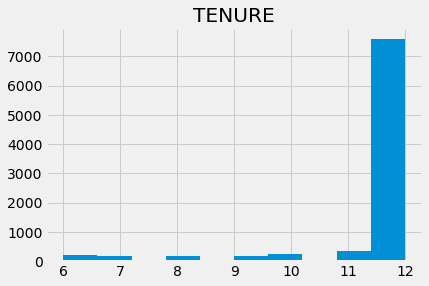

In [5]:
#separating df value as new data frame df2 to plot histogram
df2 = df[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX','TENURE']]
for col in df2.columns:
  plt.figure(figsize=(20,10))
  df2.hist(col)

### Data Normalization

In [6]:
temp = df
scale = StandardScaler() 
scaled = scale.fit_transform(df)
normalized = normalize(scaled)
normalized_df = pd.DataFrame(normalized, columns = temp.columns)
normalized_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,2.045620e-17,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400
5,0.053746,0.236216,0.070439,-0.162741,0.464979,-0.212827,0.200300,-0.309430,0.251125,-0.307920,-0.217060,-0.123079,-0.337651,-0.052460,3.018874e-01,-0.239621,0.164449
6,-0.061079,0.070277,0.386516,0.474842,0.041598,-0.063318,0.172252,0.362648,0.216928,-0.091610,-0.064578,0.268991,0.335747,0.216537,-3.877375e-02,0.392491,0.048925
7,0.047238,0.196541,-0.100678,-0.135407,0.010543,-0.177081,0.481730,-0.257458,0.606676,-0.256202,-0.180603,-0.041358,-0.228806,-0.138132,-5.407251e-02,-0.199374,0.136828
8,-0.154660,0.303481,-0.038854,0.024370,-0.136724,-0.273431,-0.229170,-0.233911,-0.168672,-0.395603,-0.278870,-0.228827,0.403388,-0.211425,-1.388098e-01,-0.307855,0.211277
9,-0.223745,-0.461903,0.042969,0.136921,-0.149902,-0.153929,-0.265951,-0.039563,-0.302391,-0.222705,-0.156990,-0.155352,0.589623,-0.064744,-1.080935e-01,-0.173307,0.118939


### Dimension reduction

Dimension reduction is used to reduce 17 attributes to only 2 for ease of visualization in 2D because we cannot visualize 17 attributes in a 17 dimension. Thus, PCA is applied.

In [7]:
princi = PCA(n_components = 2)
princi_temp = princi.fit_transform(normalized_df) 
princi_temp = pd.DataFrame(princi_temp) #transforming it to pandas data frame data type
princi_temp.columns = ['P1', 'P2'] 
princi_temp.head()

,P1,P2
0,-0.489825,-0.679679
1,-0.518791,0.545009
2,0.330885,0.268977
3,-0.482374,-0.092112
4,-0.563289,-0.481915


In [8]:
#explaining the explained variances in PCA1 and PCA2
explained_variance = princi.explained_variance_ratio_
explained_variance

array([0.29040871, 0.18391053])

This array represents a vector of variances described by PCA1 and PCA2. This demonstrates that PCA1 explains 29.041% of the variance and PCA2 explains 18.391% of the variance, for a total of (29.041 + 18.391% = 47.732%) of the variance in the data.

### Hierarchical Clustering

#### Single linkage

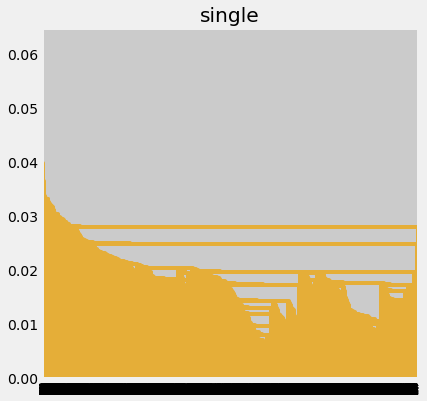

In [9]:
plt.figure(figsize =(6, 6))
plt.title('single')
Dendrogram = shc.dendrogram((shc.linkage(princi_temp, method = 'single')))

#### Silhouette scores

In [53]:
silhouette_scores = {}
method = "single"

for n_cluster in range(2, 8):
    silhouette_scores[n_cluster] = silhouette_score(princi_temp, AgglomerativeClustering(linkage = method, n_clusters
    = n_cluster).fit_predict(princi_temp))

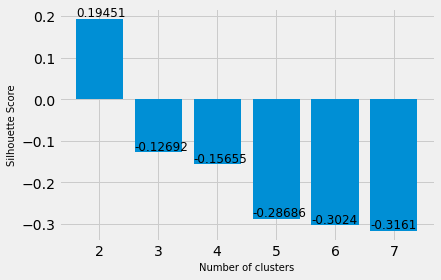

In [54]:
# Plotting a bar graph to compare the results
bars = plt.bar(silhouette_scores.keys(), silhouette_scores.values())
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, round(yval, 5), fontsize = 12)

plt.show() 

#### Clustering

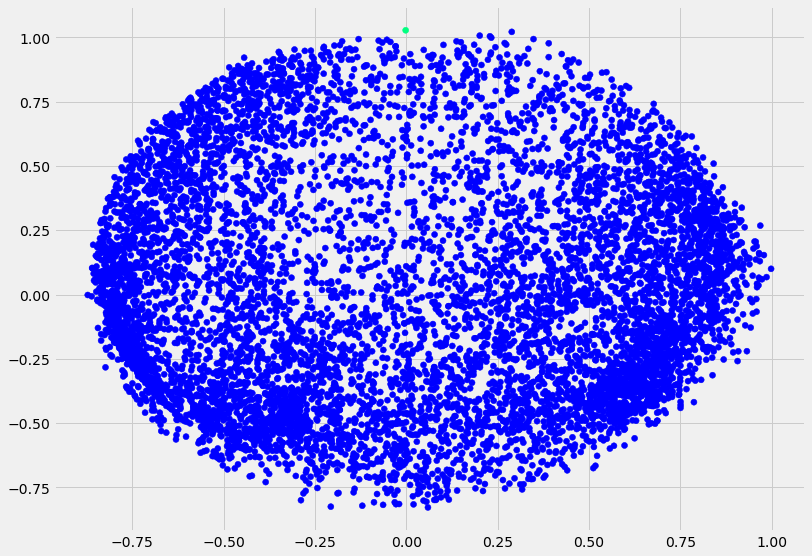

In [55]:
maxSilCluster = max(silhouette_scores, key = silhouette_scores.get)

agg = AgglomerativeClustering(linkage = method, n_clusters = maxSilCluster)
agg.fit(princi_temp)

# Visualizing the clustering
plt.figure(figsize=(12,9))
plt.scatter(princi_temp['P1'], princi_temp['P2'], c = AgglomerativeClustering(linkage = method, n_clusters = maxSilCluster).fit_predict(princi_temp), cmap = plt.cm.winter)
plt.show()

#### Complete linkage

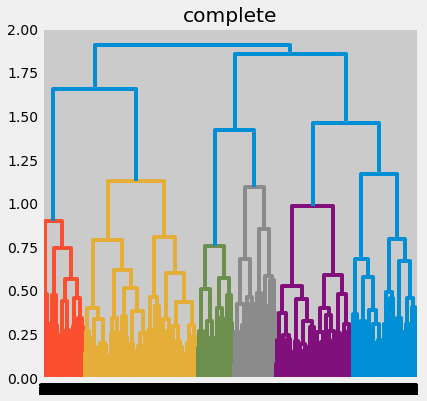

In [13]:
plt.figure(figsize =(6, 6))
plt.title('complete')
Dendrogram = shc.dendrogram((shc.linkage(princi_temp, method = 'complete')))

#### Silhouette scores

In [56]:
silhouette_scores = {}
method = "complete"

for n_cluster in range(2, 8):
    silhouette_scores[n_cluster] = silhouette_score(princi_temp, AgglomerativeClustering(linkage = method, n_clusters
    = n_cluster).fit_predict(princi_temp))

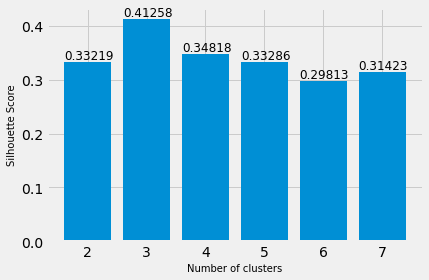

In [57]:
# Plotting a bar graph to compare the results
bars = plt.bar(silhouette_scores.keys(), silhouette_scores.values())
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, round(yval, 5), fontsize = 12)

plt.show() 

#### Clustering

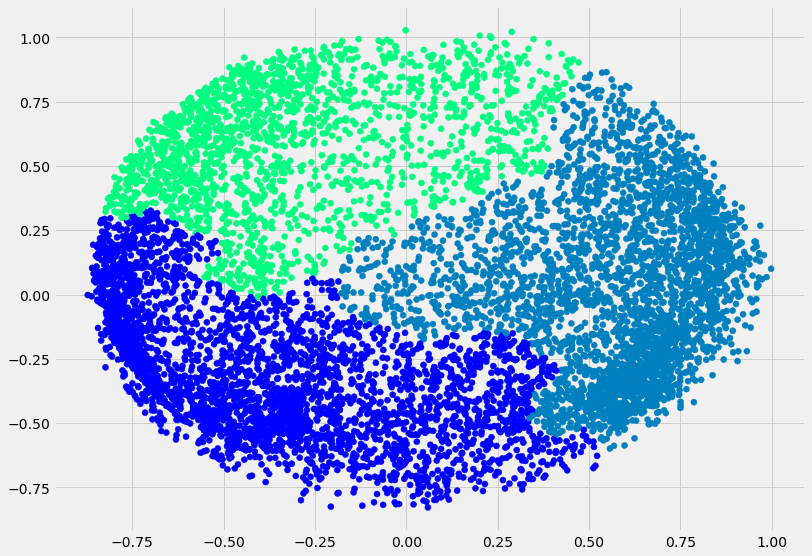

In [58]:
maxSilCluster = max(silhouette_scores, key = silhouette_scores.get)

agg = AgglomerativeClustering(linkage = method, n_clusters = maxSilCluster)
agg.fit(princi_temp)

# Visualizing the clustering
plt.figure(figsize=(12,9))
plt.scatter(princi_temp['P1'], princi_temp['P2'], c = AgglomerativeClustering(linkage = method, n_clusters = maxSilCluster).fit_predict(princi_temp), cmap = plt.cm.winter)
plt.show()

#### Average linkage

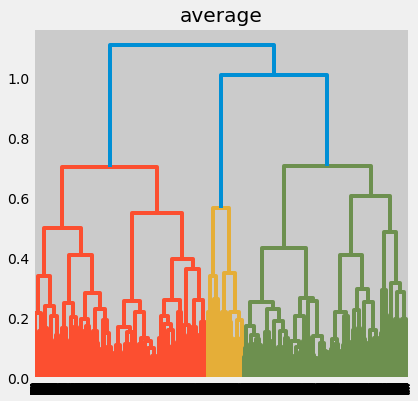

In [17]:
plt.figure(figsize =(6, 6))
plt.title('average')
Dendrogram = shc.dendrogram((shc.linkage(princi_temp, method = 'average')))

#### Silhouette scores

In [18]:
silhouette_scores = {}
method = "average"

for n_cluster in range(2, 8):
    silhouette_scores[n_cluster] = silhouette_score(princi_temp, AgglomerativeClustering(linkage = method, n_clusters
    = n_cluster).fit_predict(princi_temp))

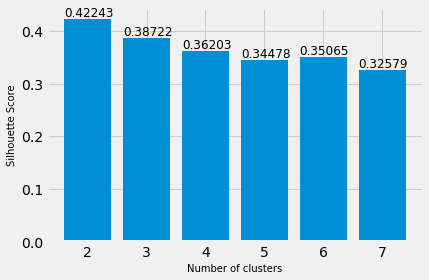

In [19]:
# Plotting a bar graph to compare the results
bars = plt.bar(silhouette_scores.keys(), silhouette_scores.values())
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, round(yval, 5), fontsize = 12)

plt.show() 

#### Clustering

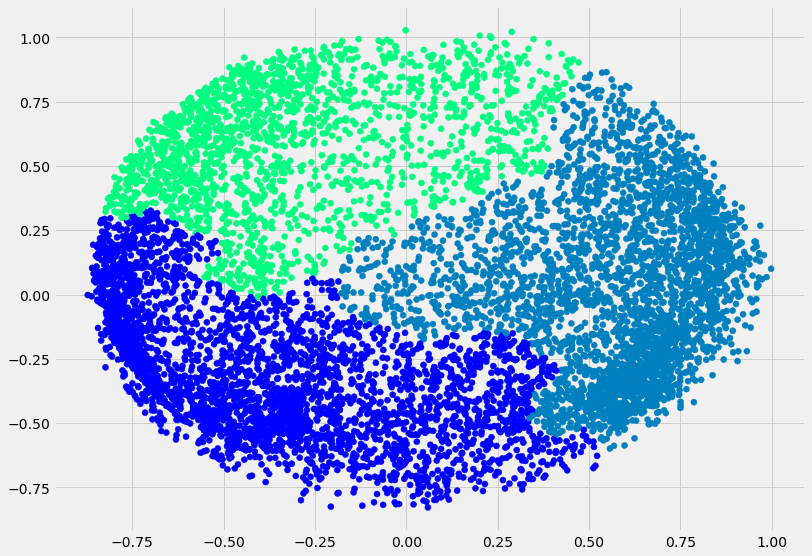

In [59]:
maxSilCluster = max(silhouette_scores, key = silhouette_scores.get)

agg = AgglomerativeClustering(linkage = method, n_clusters = maxSilCluster)
agg.fit(princi_temp)

# Visualizing the clustering
plt.figure(figsize=(12,9))
plt.scatter(princi_temp['P1'], princi_temp['P2'], c = AgglomerativeClustering(linkage = method, n_clusters = maxSilCluster).fit_predict(princi_temp), cmap = plt.cm.winter)
plt.show()

#### Ward method

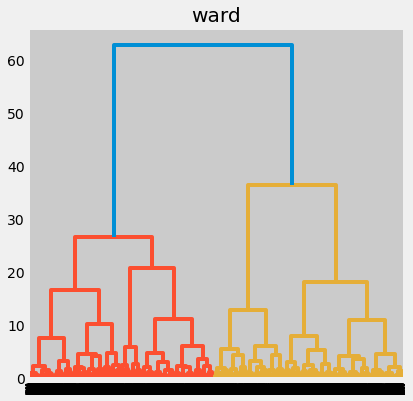

In [21]:
plt.figure(figsize =(6, 6))
plt.title('ward')
Dendrogram = shc.dendrogram((shc.linkage(princi_temp, method = 'ward')))

#### Silhouette scores

In [22]:
silhouette_scores = {}
method = "ward"

for n_cluster in range(2, 8):
    silhouette_scores[n_cluster] = silhouette_score(princi_temp, AgglomerativeClustering(linkage = method, n_clusters
    = n_cluster).fit_predict(princi_temp))

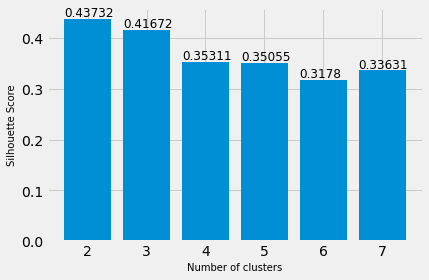

In [23]:
# Plotting a bar graph to compare the results
bars = plt.bar(silhouette_scores.keys(), silhouette_scores.values())
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, round(yval, 5), fontsize = 12)

plt.show() 

#### Clustering

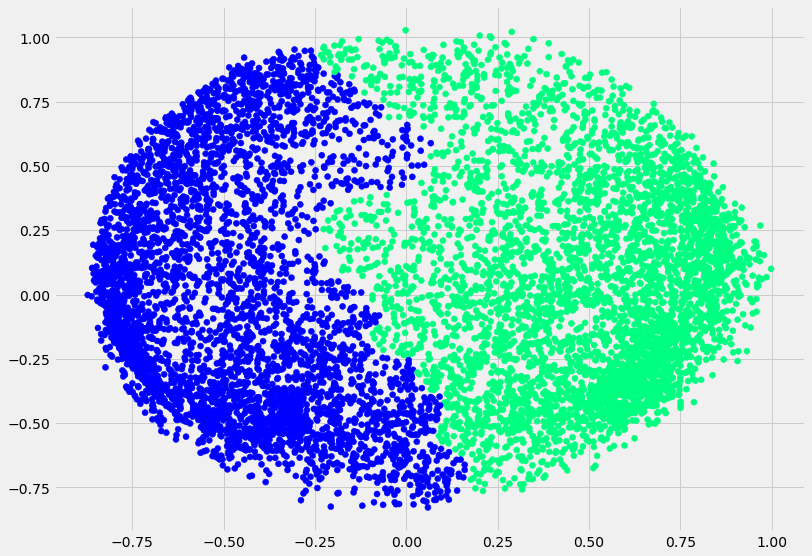

In [52]:
maxSilCluster = max(silhouette_scores, key = silhouette_scores.get)

agg = AgglomerativeClustering(linkage = method, n_clusters = maxSilCluster)
agg.fit(princi_temp)

# Visualizing the clustering
plt.figure(figsize=(12,9))
plt.scatter(princi_temp['P1'], princi_temp['P2'], c = AgglomerativeClustering(linkage = method, n_clusters = maxSilCluster).fit_predict(princi_temp), cmap = plt.cm.winter)
plt.show()

### Elbow Method

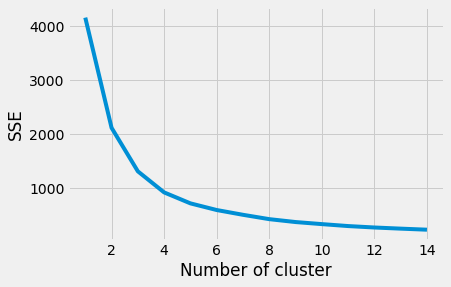

In [25]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(princi_temp)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

It is difficult to observe from elbow method as it can be 3 or 4 because both show a sharp elbow. Therefore, we use 3.

### Data Modelling

#### K-mean

In [27]:
kmean3r = KMeans(n_clusters = 3, init = 'random', random_state = 0) #3 cluster
kmean3r.fit_predict(normalized_df)
df['cluster'] = kmean3r
labels3r = kmean3r.labels_
clusters3r = pd.concat([temp, pd.DataFrame({'cluster3':labels3r})], axis=1)
clusters3r.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,cluster3
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,"KMeans(init='random', n_clusters=3, random_sta...",0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,"KMeans(init='random', n_clusters=3, random_sta...",2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,"KMeans(init='random', n_clusters=3, random_sta...",1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,"KMeans(init='random', n_clusters=3, random_sta...",0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,"KMeans(init='random', n_clusters=3, random_sta...",0


#### K-mean++

In [26]:
kmean3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0) #3 cluster
kmean3.fit_predict(normalized_df)
df['cluster'] = kmean3
labels3 = kmean3.labels_
clusters3 = pd.concat([temp, pd.DataFrame({'cluster3':labels3})], axis = 1)
clusters3.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,cluster3
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,"KMeans(n_clusters=3, random_state=0)",2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,"KMeans(n_clusters=3, random_state=0)",1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,"KMeans(n_clusters=3, random_state=0)",0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,"KMeans(n_clusters=3, random_state=0)",2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,"KMeans(n_clusters=3, random_state=0)",2


### Apply K-Mean Clustering

In [28]:
clusters3['cluster3'].value_counts()

0    3746
2    3149
1    2055
Name: cluster3, dtype: int64

In [29]:
clusters3.groupby('cluster3').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster3,,,,,,,,,,,,,,,,,
0,1175.280394,0.938218,1937.206471,1083.538345,854.074768,226.260707,0.891482,0.348023,0.717999,0.040888,0.797117,29.498131,4857.933863,1963.988189,812.465483,0.273232,11.624666
1,3551.381258,0.958821,423.670521,290.142010,133.588691,3321.134582,0.235141,0.118436,0.138627,0.407354,10.882725,5.725547,6089.085748,2731.749765,1563.216269,0.035109,11.308029
2,730.822759,0.751551,270.328644,205.505875,65.152931,345.631083,0.179718,0.084126,0.091207,0.069630,1.183550,2.980946,3021.413501,806.856765,469.591432,0.088940,11.526199


### Cluster Visualization

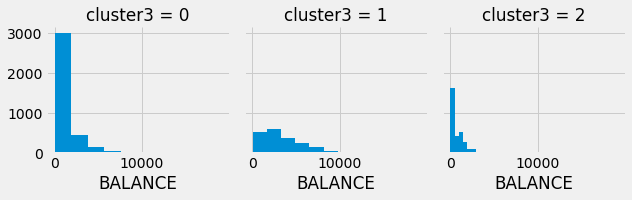

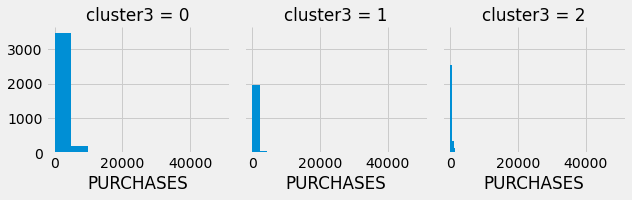

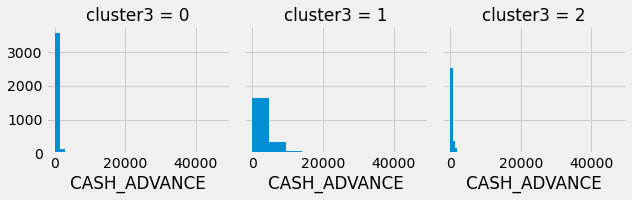

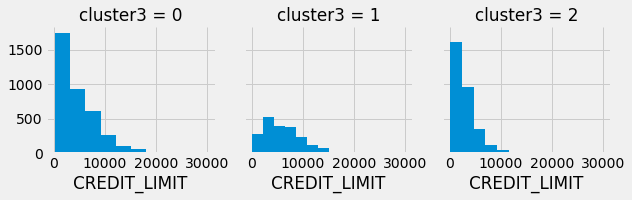

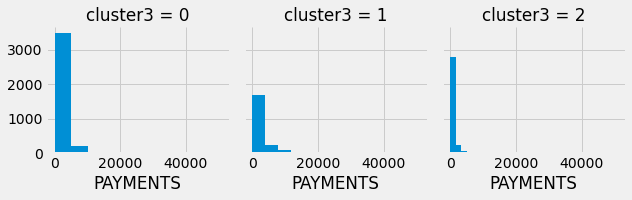

In [30]:
for c in ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']:
    grid= sns.FacetGrid(clusters3, col='cluster3')
    grid.map(plt.hist, c)

#### K-mean

In [32]:
visual3r = pd.concat([princi_temp, pd.DataFrame({'cluster3r':labels3r})], axis=1)
visual3r.head(5)

,P1,P2,cluster3r
0,-0.489825,-0.679679,0
1,-0.518791,0.545009,2
2,0.330885,0.268977,1
3,-0.482374,-0.092112,0
4,-0.563289,-0.481915,0


#### K-mean++

In [31]:
visual3 = pd.concat([princi_temp, pd.DataFrame({'cluster3':labels3})], axis=1)  
visual3.head(5)

,P1,P2,cluster3
0,-0.489825,-0.679679,2
1,-0.518791,0.545009,1
2,0.330885,0.268977,0
3,-0.482374,-0.092112,2
4,-0.563289,-0.481915,2


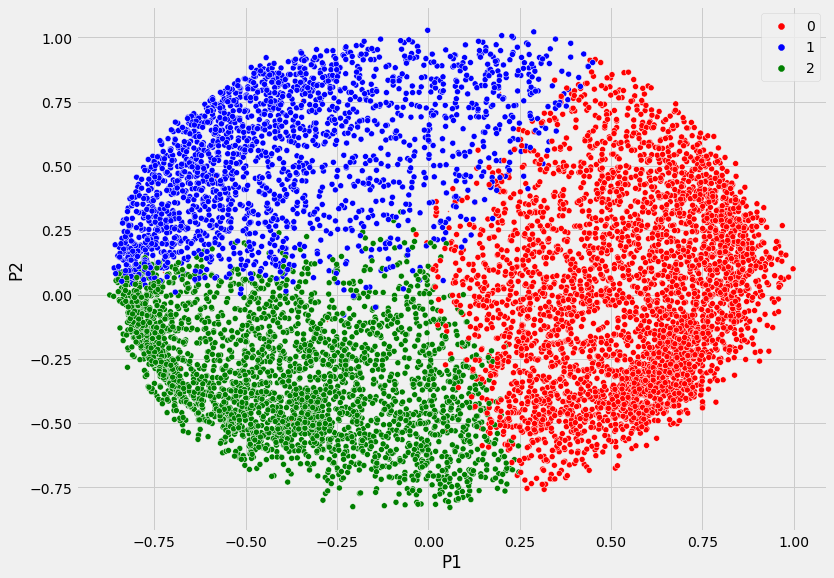

In [48]:
plt.figure(figsize=(12,9))
ax = sns.scatterplot(x="P1", y="P2", hue="cluster3", data=visual3, palette=['r','b','g'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=1)
plt.legend()
plt.show()